In [22]:
from numpy import *
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, 'velocitySlamSeq//slam_seq')

In [23]:
from moments import moments, estimation

In [24]:
params = {'a': 0.1, 'b': 0.5, 'la': 0.7, 'alpha_a': 100, 'alpha_i': 1, 'sigma': 0.6, 'beta': 0.5, 'gamma': 0.1}
print('params_true = a: %.3f, b: %.3f, la: %.3f, alpha_a: %.3f, alpha_i: %.3f, sigma: %.3f, beta: %.3f, gamma: %.3f'\
      %(params['a'], params['b'], params['la'], params['alpha_a'], params['alpha_i'], params['sigma'], params['beta'], params['gamma']))
mom = moments(**params)
t = linspace(0, 50, 10)
mom.integrate(t)
x_data = mom.get_all_centered_moments()

params_true = a: 0.100, b: 0.500, la: 0.700, alpha_a: 100.000, alpha_i: 1.000, sigma: 0.600, beta: 0.500, gamma: 0.100


In [25]:
p0_range = {'a': [0, 1], 'b': [0, 1], 'la': [0, 1], 'alpha_a': [10, 1000], \
            'alpha_i': [0, 10], 'sigma': [0, 1], 'beta': [0, 10], 'gamma': [0, 10]}
estm = estimation(list(p0_range.values()))
#p0 = estm.sample_p0()
#print('p0 = a: %.3f, b: %.3f, la: %.3f, alpha_a: %.3f, alpha_i: %.3f, sigma: %.3f, beta: %.3f, gamma: %.3f'%(p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], p0[6], p0[7]))
#popt, pcov = estm.fit(t, x_data, p0)
popt, cost = estm.fit_lsq(t, x_data, p0=None, n_p0=3)
#p0 = {'a': 0.06, 'b': 0.594, 'la': 0.7, 'alpha_a': 79.724, 'alpha_i': 444.048, 'sigma': 0.6, 'beta': 0.5, 'gamma': 0.1}
#popt, pcov = estm.fit(t, x_data, list(p0.values()), bounds=(0, inf))

In [26]:
print('popt = a: %.4f, b: %.4f, la: %.4f, alpha_a: %.4f, alpha_i: %.4f, sigma: %.4f, beta: %.4f, gamma: %.4f'%(popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]))

popt = a: 0.1037, b: 0.4963, la: 0.7000, alpha_a: 100.3684, alpha_i: 2.8018, sigma: 0.6000, beta: 0.5000, gamma: 0.1000


In [27]:
mom2 = moments(*popt)
t2 = linspace(0, 50, 100)
mom2.integrate(t2)
x_fit = mom2.get_all_centered_moments()

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,0,'t')

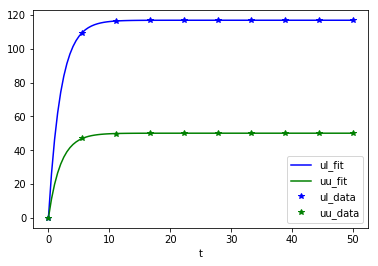

In [29]:
plt.plot(t2, x_fit[0], 'b', label='ul_fit')
plt.plot(t2, x_fit[1], 'g', label='uu_fit')
plt.plot(t, x_data[0], 'b*', label='ul_data')
plt.plot(t, x_data[1], 'g*', label='uu_data')
plt.legend(loc='best')
plt.xlabel('t')

Text(0.5,0,'t')

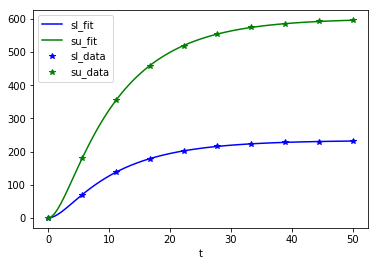

In [30]:
plt.plot(t2, x_fit[2], 'b', label='sl_fit')
plt.plot(t2, x_fit[3], 'g', label='su_fit')
plt.plot(t, x_data[2], 'b*', label='sl_data')
plt.plot(t, x_data[3], 'g*', label='su_data')
plt.legend(loc='best')
plt.xlabel('t')

Text(0.5,0,'t')

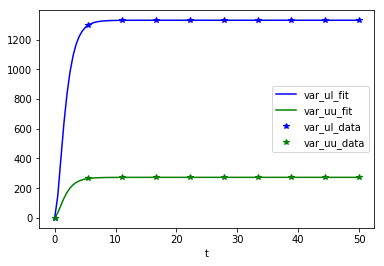

In [31]:
plt.plot(t2, x_fit[4], 'b', label='var_ul_fit')
plt.plot(t2, x_fit[5], 'g', label='var_uu_fit')
plt.plot(t, x_data[4], 'b*', label='var_ul_data')
plt.plot(t, x_data[5], 'g*', label='var_uu_data')
plt.legend(loc='best')
plt.xlabel('t')

Text(0.5,0,'t')

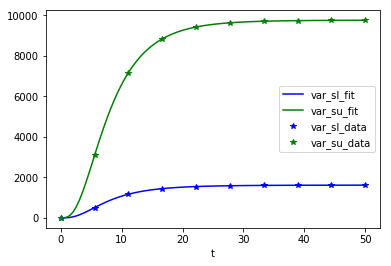

In [32]:
plt.plot(t2, x_fit[6], 'b', label='var_sl_fit')
plt.plot(t2, x_fit[7], 'g', label='var_su_fit')
plt.plot(t, x_data[6], 'b*', label='var_sl_data')
plt.plot(t, x_data[7], 'g*', label='var_su_data')
plt.legend(loc='best')
plt.xlabel('t')

In [33]:
x_data_full = mom.x
x_fit_full = mom2.x

Text(0.5,0,'t')

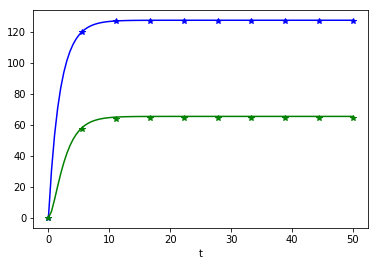

In [34]:
plt.plot(t2, x_fit_full[:,0], 'b')
plt.plot(t2, x_fit_full[:,1], 'g')
plt.plot(t, x_data_full[:,0], 'b*')
plt.plot(t, x_data_full[:,1], 'g*')
plt.legend(loc='best')
plt.xlabel('t')

Text(0.5,0,'t')

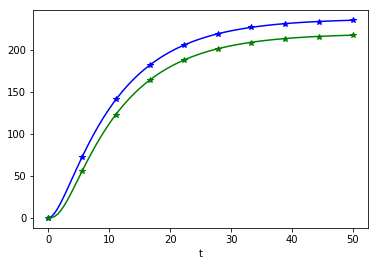

In [35]:
plt.plot(t2, x_fit_full[:,4], 'b')
plt.plot(t2, x_fit_full[:,5], 'g')
plt.plot(t, x_data_full[:,4], 'b*')
plt.plot(t, x_data_full[:,5], 'g*')
plt.legend(loc='best')
plt.xlabel('t')

In [36]:
x_data_nosplice = mom.get_nosplice_centered_moments()
estm = estimation(list(p0_range.values()))
popt, cost = estm.fit_lsq(t, x_data_nosplice, p0=None, n_p0=3, experiment_type='nosplice')

In [37]:
print('params_true = a: %.3f, b: %.3f, la: %.3f, alpha_a: %.3f, alpha_i: %.3f, sigma: %.3f, beta: %.3f, gamma: %.3f'\
      %(params['a'], params['b'], params['la'], params['alpha_a'], params['alpha_i'], params['sigma'], params['beta'], params['gamma']))
print('popt = a: %.4f, b: %.4f, la: %.4f, alpha_a: %.4f, alpha_i: %.4f, sigma: %.4f, beta: %.4f, gamma: %.4f'%(popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]))

params_true = a: 0.100, b: 0.500, la: 0.700, alpha_a: 100.000, alpha_i: 1.000, sigma: 0.600, beta: 0.500, gamma: 0.100
popt = a: 0.1908, b: 0.6028, la: 0.5548, alpha_a: 100.6945, alpha_i: 9.1287, sigma: 1.0000, beta: 0.1278, gamma: 0.2115


In [38]:
mom2 = moments(*popt)
t2 = linspace(0, 50, 100)
mom2.integrate(t2)
x_fit = mom2.get_nosplice_centered_moments()

Text(0.5,0,'t')

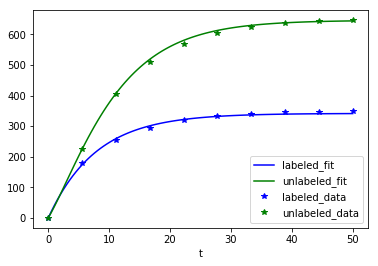

In [39]:
plt.plot(t2, x_fit[0], 'b', label='labeled_fit')
plt.plot(t2, x_fit[1], 'g', label='unlabeled_fit')
plt.plot(t, x_data_nosplice[0], 'b*', label='labeled_data')
plt.plot(t, x_data_nosplice[1], 'g*', label='unlabeled_data')
plt.legend(loc='best')
plt.xlabel('t')

Text(0.5,0,'t')

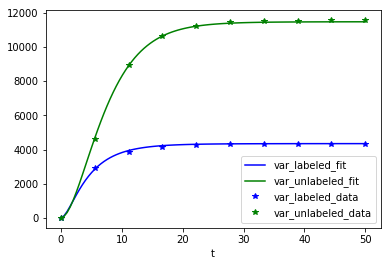

In [40]:
plt.plot(t2, x_fit[2], 'b', label='var_labeled_fit')
plt.plot(t2, x_fit[3], 'g', label='var_unlabeled_fit')
plt.plot(t, x_data_nosplice[2], 'b*', label='var_labeled_data')
plt.plot(t, x_data_nosplice[3], 'g*', label='var_unlabeled_data')
plt.legend(loc='best')
plt.xlabel('t')